# SML Exercise -- SVMs for Regression

In [1]:
# Imports:
import pandas as pd
import turicreate as tc
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import seaborn as sns

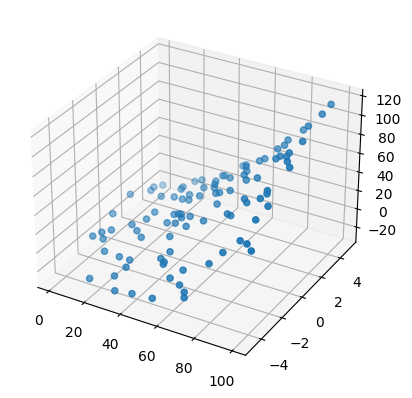

In [2]:
# 1) Load RVT.csv into a Pandas dataframe. Then
# Use matplotlib to create a 3d scatter plot of the data with ‘T’ as the z-axis.
# Copy the ‘R’ and ‘V’ columns into a dataframe named ‘features’.
# Copy the ‘T’ column into a dataframe named ‘labels’.
# Split the data 80%/10%/10% into training/validation/testing sets.
# Create three empty lists named ‘models’, ‘train_error’, and ‘val_error’.

data = pd.read_csv('RVT.csv')

fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(data['R'], data['V'], data['T'])
plt.show()

features = pd.DataFrame(data['R'], data['V'])
labels = pd.DataFrame(data['T'])

train, remaining = train_test_split(data, train_size=0.7, random_state=42)
val, test = train_test_split(remaining, train_size=2/3, random_state=42)
train_data = tc.SFrame(train)
val_data = tc.SFrame(val)
test_data = tc.SFrame(test)

models = []
train_error = []
val_error = []

In [3]:
# 2) Use the sklearn class StandardScaler() to standardize the data.
# Fit the scaler on the features in the training set.
# Transform the features in all three sets using the scaler.

scaler = StandardScaler()

scaler.fit(train[['R', 'V']])

train_scaled = scaler.transform(train[['R', 'V']])
val_scaled = scaler.transform(val[['R', 'V']])
test_scaled = scaler.transform(test[['R', 'V']])

In [4]:
# 3) Train and evaluate SVM models for regression using the linear kernel. Create two models, one with C=100 and another with C=0.01. For each model:
# Append a text description (e.g. ‘linear C=100’) of the model to models.
# Make predictions on training and validation data and store these in a NumPy arrays.
# Use sklearn to calculate root mean squared error on training and validation sets and append these to train_error and val_error.

# C=100
svm_100 = SVR(kernel='linear', C=100)
svm_100.fit(train_scaled, train['T'])
models.append('linear C=100')
train_pred_100 = np.array(svm_100.predict(train_scaled))
val_pred_100 = np.array(svm_100.predict(val_scaled))
train_error.append(mean_squared_error(train['T'], train_pred_100, squared=False))
val_error.append(mean_squared_error(val['T'], val_pred_100, squared=False))

# C=0.01
svm_001 = SVR(kernel='linear', C=0.01)
svm_001.fit(train_scaled, train['T'])
models.append('linear C=0.01')
train_pred_001 = np.array(svm_001.predict(train_scaled))
val_pred_001 = np.array(svm_001.predict(val_scaled))
train_error.append(mean_squared_error(train['T'], train_pred_001, squared=False))
val_error.append(mean_squared_error(val['T'], val_pred_001, squared=False))

In [5]:
# 4) Train and evaluate SVM models for regression using the polynomial kernel with ‘degree = 2’. Create two models, one with C=100 and another with C=0.01. For each model:
# Append a text description of the model to models.
# Make predictions on training and validation data and store these in a NumPy arrays.
# Use sklearn to calculate root mean squared error on training and validation sets and append these to train_error and val_error.

# C=100
svm_100 = SVR(kernel='poly', C=100, degree=2)
svm_100.fit(train_scaled, train['T'])
models.append('polynomial C=100')
train_pred_100 = np.array(svm_100.predict(train_scaled))
val_pred_100 = np.array(svm_100.predict(val_scaled))
train_error.append(mean_squared_error(train['T'], train_pred_100, squared=False))
val_error.append(mean_squared_error(val['T'], val_pred_100, squared=False))

# C=0.01
svm_001 = SVR(kernel='linear', C=0.01, degree=2)
svm_001.fit(train_scaled, train['T'])
models.append('polynomial C=0.01')
train_pred_001 = np.array(svm_001.predict(train_scaled))
val_pred_001 = np.array(svm_001.predict(val_scaled))
train_error.append(mean_squared_error(train['T'], train_pred_001, squared=False))
val_error.append(mean_squared_error(val['T'], val_pred_001, squared=False))

In [6]:
# 5) Train and evaluate SVM models for regression using the RBF kernel. Create four models: C=100 & gamma=10, C=100 & gamma=0.1, C=0.01 & gamma=10, C=0.01 & gamma = 0.1. For each model:
# Append a text description of the model to models.
# Make predictions on training and validation data and store these in a NumPy arrays.
# Use sklearn to calculate root mean squared error on training and validation sets and append these to train_error and val_error.

# C=100 & gamma=10
svm_100_10 = SVR(kernel='rbf', C=100, gamma=10)
svm_100_10.fit(train_scaled, train['T'])
models.append('RBF C=100, gamma=10')
train_pred_100_10 = np.array(svm_100_10.predict(train_scaled))
val_pred_100_10 = np.array(svm_100_10.predict(val_scaled))
train_error.append(mean_squared_error(train['T'], train_pred_100_10, squared=False))
val_error.append(mean_squared_error(train['T'], train_pred_100_10, squared=False))

# C=100 & gamma=0.1
svm_100_01 = SVR(kernel='rbf', C=100, gamma=0.1)
svm_100_01.fit(train_scaled, train['T'])
models.append('RBF C=100, gamma=0.1')
train_pred_100_01 = np.array(svm_100_01.predict(train_scaled))
val_pred_100_01 = np.array(svm_100_01.predict(val_scaled))
train_error.append(mean_squared_error(train['T'], train_pred_100_01, squared=False))
val_error.append(mean_squared_error(train['T'], train_pred_100_01, squared=False))

# C=0.01 & gamma=10
svm_001_10 = SVR(kernel='rbf', C=0.01, gamma=10)
svm_001_10.fit(train_scaled, train['T'])
models.append('RBF C=0.01, gamma=10')
train_pred_001_10 = np.array(svm_001_10.predict(train_scaled))
val_pred_001_10 = np.array(svm_001_10.predict(val_scaled))
train_error.append(mean_squared_error(train['T'], train_pred_001_10, squared=False))
val_error.append(mean_squared_error(train['T'], train_pred_001_10, squared=False))

# C=0.01 & gamma=0.1
svm_001_01 = SVR(kernel='rbf', C=0.01, gamma=0.1)
svm_001_01.fit(train_scaled, train['T'])
models.append('RBF C=0.01, gamma=0.1')
train_pred_001_01 = np.array(svm_001_01.predict(train_scaled))
val_pred_001_01 = np.array(svm_001_01.predict(val_scaled))
train_error.append(mean_squared_error(train['T'], train_pred_001_01, squared=False))
val_error.append(mean_squared_error(train['T'], train_pred_001_01, squared=False))

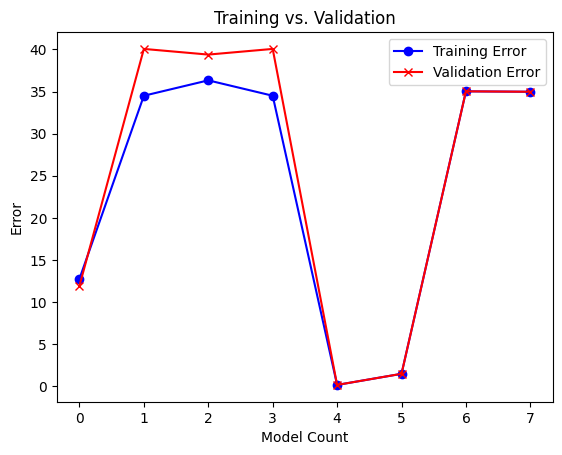

                  Models  Training Error  Validation Error
0           linear C=100       12.749922         11.921464
1          linear C=0.01       34.499341         40.060458
2       polynomial C=100       36.328641         39.387859
3      polynomial C=0.01       34.499341         40.060458
4    RBF C=100, gamma=10        0.151258          0.151258
5   RBF C=100, gamma=0.1        1.471558          1.471558
6   RBF C=0.01, gamma=10       35.023356         35.023356
7  RBF C=0.01, gamma=0.1       34.972372         34.972372


In [7]:
# 6) Compare the models.
# Use matplotlib to plot the training and validation errors for each model.
# Create and display dataframe with models, train_error, and val_error as the columns. Label the columns.
# Add a markdown cell to compare the models and justify a choice of model. Be sure to comment on overfitting/underfitting.

# Plot visual
plt.plot(train_error, label='Training Error', marker='o', color='blue')
plt.plot(val_error, label='Validation Error', marker='x', color='red')
plt.xlabel('Model Count')
plt.ylabel('Error')
plt.title('Training vs. Validation')
plt.legend()
plt.show()

# Display dataframe
df = pd.DataFrame({
    'Models': models,
    'Training Error': train_error,
    'Validation Error': val_error
})
print(df)

**Explanation:**

The best model appears to be the first one (Model 0). It achieves a balance between underfitting and overfitting, as evidenced by its training error of 12.75 and validation error of 11.92. 
In contrast, Models 4 and 5 have such low errors that they may overfit the data, while the remaining models show signs of underfitting due to higher errors. 
Model 0’s moderate and aligned errors indicate better generalization.

In [8]:
# Here is the markdown again:

# The best model appears to be the first one (Model 0). It achieves a balance between underfitting and overfitting, as evidenced by its training error of 12.75 and validation error of 11.92. 
# In contrast, Models 4 and 5 have such low errors that they may overfit the data, while the remaining models show signs of underfitting due to higher errors. 
# Model 0’s moderate and aligned errors indicate better generalization.

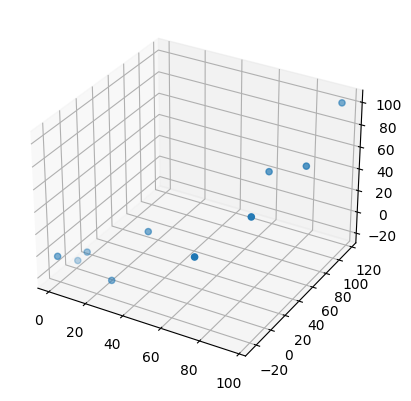

Root Mean Square Error (RMSE): 13.323562364008033


In [9]:
# 7) Evaluate the best model on test data.
# Use the best model to make predictions on the test data.
# Use matplotlib to create a 3d plot of the test data. Place ‘R’ and ‘T’ on the x- and y-axes, and place the predictions on the z-axis.
# Calculate and display the root mean squared error on the test data.

svm_100 = SVR(kernel='linear', C=100)
svm_100.fit(train_scaled, train['T'])
test_pred = np.array(svm_100.predict(test_scaled))

fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(test['R'], test['T'], test_pred)
plt.show()

print('Root Mean Square Error (RMSE):', mean_squared_error(test['T'], test_pred, squared=False))